Perplexity and PCA testing

In [151]:
# Src Vocab from Agreement-Simple dataset
SIMPLE_SRC_VOCAB = ['', '.', 'a', 'blue', 'circle', 'cross', 'cyan', 'ellipse', 'gray', 'green', 'is', 'magenta',
            'pentagon', 'rectangle', 'red', 'semicircle', 'shape', 'square', 'there', 'triangle', 'yellow', '[UNKNOWN]']

# Shape and colours
SHAPES = ['circle', 'cross', 'ellipse', 'pentagon', 'rectangle', 'semicircle', 'square', 'triangle']   # Specific shapes
SHAPES_HYPERNYMS = ['shape']      # Abstract words for shapes
COLORS = ['blue', 'cyan', 'gray', 'green', 'magenta', 'red', 'yellow']  # Color words
STOPS = ['a', 'an', 'there', 'is', "."]      # Stop words
AUX_VOCAB = ['[UNKNOWN]', "<S>", "</S>"]    # Aux words to useful vocabulary
SPATIAL_AUX_VOCAB = ["above", "below", "left", "right", "of", "to"]


AGREEMENT_ONESHAPE_VOCAB = AUX_VOCAB + SHAPES + SHAPES_HYPERNYMS + COLORS + STOPS + [""]
AGREEMENT_SPATIAL_VOCAB = AGREEMENT_ONESHAPE_VOCAB + SPATIAL_AUX_VOCAB+ [""]


AUX_VOCAB = ["", '[UNKNOWN]', "<S>", "</S>"]

SHAPE_COLOR_VOCAB = AUX_VOCAB + ['blue', 'circle', 'cross', 'cyan', 'ellipse', 'gray', 'green', 'magenta', 'pentagon',
                                 'rectangle', 'red', 'semicircle', 'square', 'triangle', 'yellow']
SHAPE_VOCAB = AUX_VOCAB + ['circle', 'cross', 'ellipse', 'pentagon', 'rectangle', 'semicircle', 'square', 'triangle']
COLOR_VOCAB = AUX_VOCAB + ['blue', 'cyan', 'gray', 'green', 'magenta', 'red', 'yellow']
STANDARD_VOCAB = AUX_VOCAB + ['.', 'a', 'blue', 'circle', 'cross', 'cyan', 'ellipse', 'gray', 'green', 'is', 'magenta',
                        'pentagon', 'rectangle', 'red', 'semicircle', 'shape', 'square', 'there', 'triangle', 'yellow']

SIMPLE_TGT_VOCAB_ = {"shape": SHAPE_VOCAB, "color": COLOR_VOCAB, "shapecolor": SHAPE_COLOR_VOCAB, "existential": STANDARD_VOCAB}


In [334]:

# SRC VOCAB FROM SHAPEWORLD API
SIMPLE_SRC_VOCAB = ['', '.', 'a', 'blue', 'circle', 'cross', 'cyan', 'ellipse', 'gray', 'green', 'is', 'magenta',
            'pentagon', 'rectangle', 'red', 'semicircle', 'shape', 'square', 'there', 'triangle', 'yellow', '[UNKNOWN]']

# Shape and colours
SHAPES = ['circle', 'cross', 'ellipse', 'pentagon', 'rectangle', 'semicircle', 'square', 'triangle']   # Specific shapes
SHAPES_AUX = ['shape']      # Abstract words for shapes
COLORS = ['blue', 'cyan', 'gray', 'green', 'magenta', 'red', 'yellow']  # Color words
STOPS = ['a', 'an', 'there', 'is', "."]      # Stop words
AUX_VOCAB = ["", '[UNKNOWN]', "<S>", "</S>"]    # Aux words to useful vocabulary

SHAPE_COLOR_VOCAB = AUX_VOCAB + SHAPES + COLORS
SHAPE_VOCAB = AUX_VOCAB + SHAPES
COLOR_VOCAB = AUX_VOCAB + COLORS
STANDARD_VOCAB = AUX_VOCAB + SHAPES + COLORS + ['there', 'is', 'a']

AGREEMENT_ONESHAPE_VOCAB = AUX_VOCAB + SHAPES + SHAPES_AUX + COLORS + STOPS

In [152]:
"""
SEQ2SEQ IMAGE CAPTIONING
Tom Sherborne 8/5/18
"""
import math
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os, time, csv

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [153]:
loc

'/Users/tom/code/acs/ic_models/shape2seq/models/final/short/shapecolor/train'

In [154]:
!ls /Users/tom/code/acs/ic_models/shape2seq/models/final/short/shape

eval  test  train


In [335]:
tf.reset_default_graph()
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))

loc = './models/final/oneshape/train'
# short_root = "/Users/tom/code/acs/ic_models/shape2seq/models/final/short/"
# short_type = 'existential'
# loc = short_root + short_type + "/train"

vocab = SIMPLE_TGT_VOCAB_[short_type]
vocab = AGREEMENT_ONESHAPE_VOCAB
output_root = "/Users/tom/thesis-acs/thesis/figs/"
# output_fname = output_root + "c4-"+short_type+"-vocab-space" + ".eps"
output_fname = output_root + 'c5-oneshape-vocab-space2.eps'

ckpt = tf.train.latest_checkpoint(loc)
new_saver = tf.train.import_meta_graph(ckpt+".meta")
new_saver.restore(sess,ckpt)
var = [v for v in tf.global_variables() if v.name == 'seq_embeddings/seq_map:0'][0]
print(var)
v_ = sess.run(var)

INFO:tensorflow:Restoring parameters from ./models/final/oneshape/train/model-34364
<tf.Variable 'seq_embeddings/seq_map:0' shape=(25, 50) dtype=float32_ref>


In [336]:
len(vocab)

25

In [337]:
np.shape(v_)

(25, 50)

In [359]:
tsne = TSNE(n_components=2, perplexity=)
v_tsne = tsne.fit_transform(v_)

In [360]:
colors = []
for s in vocab:
    if s in SHAPES:
        colors.append('blue')
    elif s in COLORS:
        colors.append('red')
    else:
        colors.append('green')


/Users/tom/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


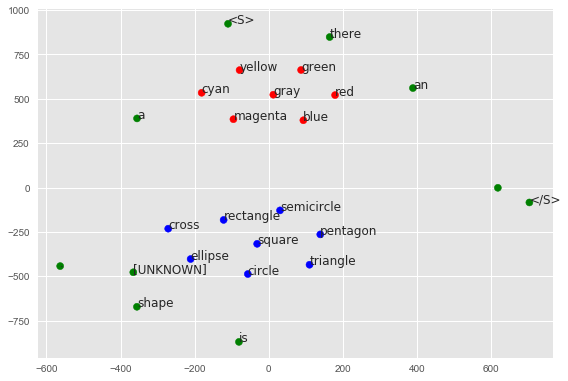

In [361]:
hfont = {'fontname':'Helvetica'}

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(v_tsne[:,0], v_tsne[:,1], c=colors,label=labels)
fig = plt.gcf()
fig.set_size_inches(8.24, 6)
ann = []
for i, txt in enumerate(vocab):
    ann.append(ax.annotate(txt, (v_tsne[i,0], v_tsne[i,1]),fontsize=12,**hfont))

mask = np.zeros(fig.canvas.get_width_height(), bool)

plt.savefig(output_fname,dpi=300)

fig.canvas.draw()


In [318]:
output_fname

'/Users/tom/thesis-acs/thesis/figs/c4-color-vocab-space.eps'

In [289]:
!ls /Users/tom/thesis-acs/thesis/figs


c4-color-vocab-space.eps       c4-shapecolor-vocab-space.eps
c4-existential-vocab-space.eps c5-oneshape-vocab-space.eps
c4-shape-vocab-space.eps
